In [1]:
# install required python libraries
# !pip install --upgrade google-api-python-client
# !pip install --upgrade google-auth-httplib2
# !pip install --upgrade google-auth-oauthlib

### Read Data from Google Sheet

We are going to read the values from this following google sheet.

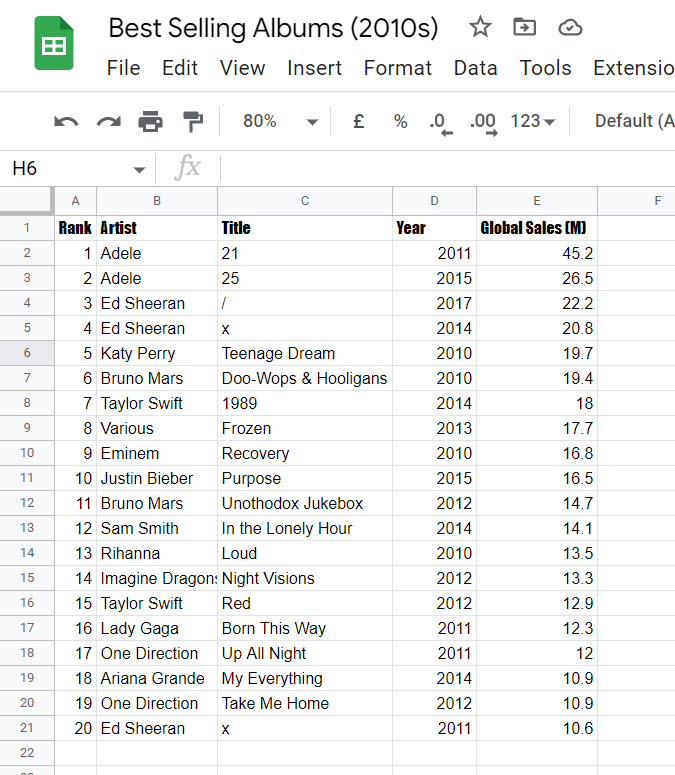

The sheet link is

https://docs.google.com/spreadsheets/d/1N9xhbmlouFsQyMTvdLCBnP20Vm4R2pU0kxbMk2TJb1k/edit?usp=sharing

In [2]:
from googleapiclient.discovery import build
from googleapiclient.errors import HttpError
from google.oauth2 import service_account

SCOPES = ['https://www.googleapis.com/auth/spreadsheets']
SERVICE_ACCOUNT_FILE = 'keys.json'

creds = None
creds = service_account.Credentials.from_service_account_file(
        SERVICE_ACCOUNT_FILE, scopes=SCOPES)

# The ID of spreadsheet.
SAMPLE_SPREADSHEET_ID = '1N9xhbmlouFsQyMTvdLCBnP20Vm4R2pU0kxbMk2TJb1k'

try:
    service = build('sheets', 'v4', credentials=creds)

    # Call the Sheets API
    sheet = service.spreadsheets()
    result = sheet.values().get(spreadsheetId=SAMPLE_SPREADSHEET_ID,
                                range='Albums!A1:E21').execute()
    values = result.get('values', [])
    print(values)

except HttpError as err:
    print(err)

[['Rank', 'Artist', 'Title', 'Year', 'Global Sales (M)'], ['1', 'Adele', '21', '2011', '45.2'], ['2', 'Adele', '25', '2015', '26.5'], ['3', 'Ed Sheeran', '/', '2017', '22.2'], ['4', 'Ed Sheeran', 'x', '2014', '20.8'], ['5', 'Katy Perry', 'Teenage Dream', '2010', '19.7'], ['6', 'Bruno Mars', 'Doo-Wops & Hooligans', '2010', '19.4'], ['7', 'Taylor Swift', '1989', '2014', '18'], ['8', 'Various', 'Frozen', '2013', '17.7'], ['9', 'Eminem', 'Recovery', '2010', '16.8'], ['10', 'Justin Bieber', 'Purpose', '2015', '16.5'], ['11', 'Bruno Mars', 'Unothodox Jukebox', '2012', '14.7'], ['12', 'Sam Smith', 'In the Lonely Hour', '2014', '14.1'], ['13', 'Rihanna', 'Loud', '2010', '13.5'], ['14', 'Imagine Dragons', 'Night Visions', '2012', '13.3'], ['15', 'Taylor Swift', 'Red', '2012', '12.9'], ['16', 'Lady Gaga', 'Born This Way', '2011', '12.3'], ['17', 'One Direction', 'Up All Night', '2011', '12'], ['18', 'Ariana Grande', 'My Everything', '2014', '10.9'], ['19', 'One Direction', 'Take Me Home', '2012'

In [3]:
# Display the values as dataframe
import pandas as pd
df=pd.DataFrame(values)
df.columns = values[0]
df = df[1:]
df

,Rank,Artist,Title,Year,Global Sales (M)
1,1,Adele,21,2011,45.2
2,2,Adele,25,2015,26.5
3,3,Ed Sheeran,/,2017,22.2
4,4,Ed Sheeran,x,2014,20.8
5,5,Katy Perry,Teenage Dream,2010,19.7
6,6,Bruno Mars,Doo-Wops & Hooligans,2010,19.4
7,7,Taylor Swift,1989,2014,18
8,8,Various,Frozen,2013,17.7
9,9,Eminem,Recovery,2010,16.8
10,10,Justin Bieber,Purpose,2015,16.5


In [4]:
# change datatype
df['Global Sales (M)'] = df['Global Sales (M)'].astype('float64')

### Calculate total sales by artist

In [5]:
df_grouped = df[['Artist', 'Global Sales (M)']].groupby('Artist', as_index=False).sum().sort_values(by='Global Sales (M)', ascending=False)
df_grouped

,Artist,Global Sales (M)
0,Adele,71.7
3,Ed Sheeran,53.6
2,Bruno Mars,34.1
12,Taylor Swift,30.9
9,One Direction,22.9
7,Katy Perry,19.7
13,Various,17.7
4,Eminem,16.8
6,Justin Bieber,16.5
11,Sam Smith,14.1


In [6]:
# extract the values to write in the spreadsheet
input_values = df_grouped.values.tolist()
input_values

[['Adele', 71.7],
 ['Ed Sheeran', 53.6],
 ['Bruno Mars', 34.099999999999994],
 ['Taylor Swift', 30.9],
 ['One Direction', 22.9],
 ['Katy Perry', 19.7],
 ['Various', 17.7],
 ['Eminem', 16.8],
 ['Justin Bieber', 16.5],
 ['Sam Smith', 14.1],
 ['Rihanna', 13.5],
 ['Imagine Dragons', 13.3],
 ['Lady Gaga', 12.3],
 ['Ariana Grande', 10.9]]

### Write Data

In [7]:
request = sheet.values().update(spreadsheetId=SAMPLE_SPREADSHEET_ID,
                               range="Sheet2!A1", valueInputOption="USER_ENTERED",
                               body={"values":input_values}).execute()

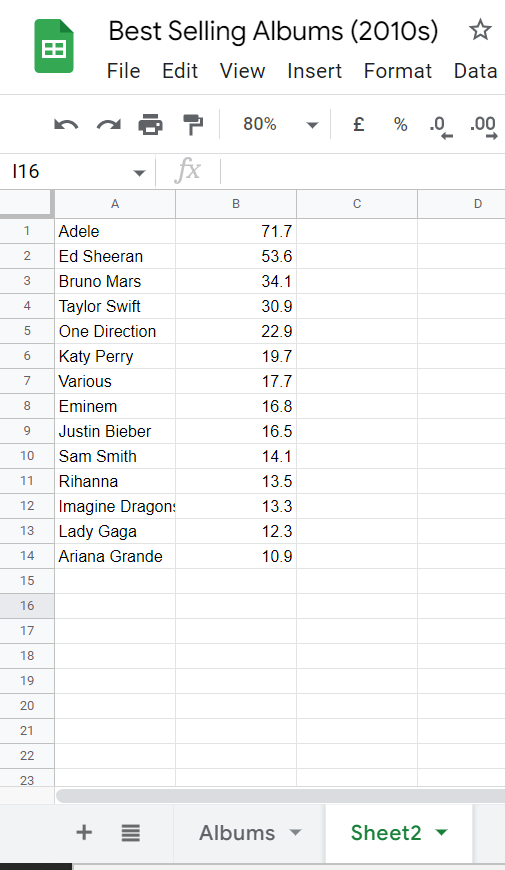

We can see updated values in sheet2.

You can check the results by clicking this url.

https://docs.google.com/spreadsheets/d/1N9xhbmlouFsQyMTvdLCBnP20Vm4R2pU0kxbMk2TJb1k/edit?usp=sharing